# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



590

In [36]:
cities


['albany',
 'cherskiy',
 'maumere',
 'chokurdakh',
 'luanda',
 'saskylakh',
 'belushya guba',
 'punta arenas',
 'port blair',
 'bredasdorp',
 'igrim',
 'vila franca do campo',
 'pacific grove',
 'fairbanks',
 'san patricio',
 'new norfolk',
 'rikitea',
 'bluff',
 'mrirt',
 'mataura',
 'escanaba',
 'upernavik',
 'yellowknife',
 'kaili',
 'karakendzha',
 'ushuaia',
 'vanimo',
 'nuuk',
 'camargo',
 'barrow',
 'swift current',
 'mar del plata',
 'balkhash',
 'hermanus',
 'vaini',
 'cape town',
 'ponta do sol',
 'khatanga',
 'hobart',
 'chauk',
 'agadir',
 'broome',
 'kavieng',
 'busselton',
 'palmer',
 'miajadas',
 'ola',
 'malwan',
 'kyabe',
 'jamestown',
 'muros',
 'lolua',
 'butaritari',
 'carnarvon',
 'suao',
 'thompson',
 'kovernino',
 'bubaque',
 'salalah',
 'saleaula',
 'korla',
 'kapaa',
 'tura',
 'santa fe',
 'goderich',
 'saint-philippe',
 'iquitos',
 'ambon',
 'sibut',
 'mnogovershinnyy',
 'mahebourg',
 'virginia beach',
 'mehamn',
 'chake chake',
 'ebano',
 'faanui',
 'tiksi',


In [18]:
# # Save config information and build URL for one city
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "longyearbyen"
# units = "imperial"

# # Build query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

# print(query_url)

# # print(weather_api_key)

http://api.openweathermap.org/data/2.5/weather?appid=75655c85820b20d2970fea69dab970e5&units=imperial&q=longyearbyen


In [20]:
# # Get weather data for one city
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# print(weather_json)

{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 31.84, 'feels_like': 22.8, 'temp_min': 31.84, 'temp_max': 31.84, 'pressure': 1012, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1631400200, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 1631416528, 'sunset': 1631471536}, 'timezone': 7200, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}


In [21]:
# # pretty print the result to capture needed values for api call saves
# print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 78.2186,
        "lon": 15.6401
    },
    "dt": 1631400200,
    "id": 2729907,
    "main": {
        "feels_like": 22.8,
        "humidity": 80,
        "pressure": 1012,
        "temp": 31.84,
        "temp_max": 31.84,
        "temp_min": 31.84
    },
    "name": "Longyearbyen",
    "sys": {
        "country": "SJ",
        "id": 1663,
        "sunrise": 1631416528,
        "sunset": 1631471536,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 11.5
    }
}


In [22]:
# # City, Lat, Lng, max temp, Humidity, Cloudiness,	Wind Speed,	Country	Date,
# # capture first recoreds to a DF


# city = weather_json["name"]
# lat = weather_json["coord"]["lat"]
# lon = weather_json["coord"]["lon"]
# maxtemp = weather_json["main"]["temp_max"]
# humidity = weather_json["main"]["humidity"]
# cloudiness = weather_json["clouds"]["all"]
# windspeed = weather_json["wind"]["speed"]
# date = datetime.datetime.fromtimestamp(weather_json["dt"]).strftime('%Y-%m-%d')
# print(city)
# print(lat)
# print(lon)
# print(maxtemp)
# print(humidity)
# print(cloudiness)
# print(windspeed)
# print(date)

Longyearbyen
78.2186
15.6401
31.84
80
0
11.5
2021-09-11


In [37]:
cities

['albany',
 'cherskiy',
 'maumere',
 'chokurdakh',
 'luanda',
 'saskylakh',
 'belushya guba',
 'punta arenas',
 'port blair',
 'bredasdorp',
 'igrim',
 'vila franca do campo',
 'pacific grove',
 'fairbanks',
 'san patricio',
 'new norfolk',
 'rikitea',
 'bluff',
 'mrirt',
 'mataura',
 'escanaba',
 'upernavik',
 'yellowknife',
 'kaili',
 'karakendzha',
 'ushuaia',
 'vanimo',
 'nuuk',
 'camargo',
 'barrow',
 'swift current',
 'mar del plata',
 'balkhash',
 'hermanus',
 'vaini',
 'cape town',
 'ponta do sol',
 'khatanga',
 'hobart',
 'chauk',
 'agadir',
 'broome',
 'kavieng',
 'busselton',
 'palmer',
 'miajadas',
 'ola',
 'malwan',
 'kyabe',
 'jamestown',
 'muros',
 'lolua',
 'butaritari',
 'carnarvon',
 'suao',
 'thompson',
 'kovernino',
 'bubaque',
 'salalah',
 'saleaula',
 'korla',
 'kapaa',
 'tura',
 'santa fe',
 'goderich',
 'saint-philippe',
 'iquitos',
 'ambon',
 'sibut',
 'mnogovershinnyy',
 'mahebourg',
 'virginia beach',
 'mehamn',
 'chake chake',
 'ebano',
 'faanui',
 'tiksi',


In [38]:
# for all cities in the cities set up list to hold each of the values
cityname = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
date = []
# smallcities = ['longyearbyen',
#  'andros town',
#  'bredasdorp',
#  'isangel']


In [39]:

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="
counter = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:

# loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        cityname.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        maxtemp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        date.append(datetime.datetime.fromtimestamp(weather_response['dt']).strftime('%Y-%m-%d'))
        print(f'City Record - {counter} for {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')
        

print('Data Retrieval Complete')


Beginning Data Retrieval
City Record - 1 for albany
City Record - 2 for cherskiy
City Record - 3 for maumere
City Record - 4 for chokurdakh
City Record - 5 for luanda
City Record - 6 for saskylakh
City Not Found
City Record - 7 for punta arenas
City Record - 8 for port blair
City Record - 9 for bredasdorp
City Record - 10 for igrim
City Record - 11 for vila franca do campo
City Record - 12 for pacific grove
City Record - 13 for fairbanks
City Record - 14 for san patricio
City Record - 15 for new norfolk
City Record - 16 for rikitea
City Record - 17 for bluff
City Not Found
City Record - 18 for mataura
City Record - 19 for escanaba
City Record - 20 for upernavik
City Record - 21 for yellowknife
City Record - 22 for kaili
City Not Found
City Record - 23 for ushuaia
City Record - 24 for vanimo
City Record - 25 for nuuk
City Record - 26 for camargo
City Record - 27 for barrow
City Record - 28 for swift current
City Record - 29 for mar del plata
City Record - 30 for balkhash
City Record - 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
# Convert Data in to a DataFrame
ct_df = pd.DataFrame({
    'City': cityname,
    'Latitude': lat,
    'Longitude': lon,
    'Tempature': maxtemp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Windspeed': windspeed,
    'Date of Weather': date
})

# expore date to .csv
ct_df.to_csv('cities.csv')

In [79]:
# display data frame
ct_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Date of Weather
0,Albany,42.6001,-73.9662,67.87,76,17,4.56,2021-09-11
1,Cherskiy,68.7500,161.3000,33.28,54,96,1.79,2021-09-11
2,Maumere,-8.6199,122.2111,81.50,71,69,3.51,2021-09-11
3,Chokurdakh,70.6333,147.9167,44.02,55,85,15.32,2021-09-11
4,Luanda,-8.8368,13.2343,72.45,91,66,2.71,2021-09-11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
----
Student Note - There were not cities with humidity > 100; as such there will be no need to check indicies or remove the cities and create new DF



In [81]:
# sorting ct_df by humidity ascending=false to dertermine if any rows are greater than 100
hum_df = ct_df.sort_values('Tempature', ascending=True)
hum_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Date of Weather
161,Ilulissat,69.2167,-51.1000,17.47,73,0,7.02,2021-09-11
86,Qaanaaq,77.4840,-69.3632,19.85,62,19,8.08,2021-09-11
19,Upernavik,72.7868,-56.1549,25.59,60,0,11.30,2021-09-11
391,Leningradskiy,69.3833,178.4167,28.99,92,100,22.21,2021-09-11
341,Pevek,69.7008,170.3133,29.98,75,100,14.70,2021-09-11


In [52]:
#  Get the indices of cities that have humidity over 100%.


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [121]:
# capture today's date for plot titles
date = today.strftime("%m/%d/%Y")

# capturing data variables for plots
lat = ct_df['Latitude']
temp = ct_df['Tempature']
humidity = ct_df['Humidity']
cloudy = ct_df['Cloudiness']
windspeed = ct_df['Windspeed']



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Student Note - The plot seems to demonstrate that as latitudes move away from the equator tempatures also decrease or increase more.

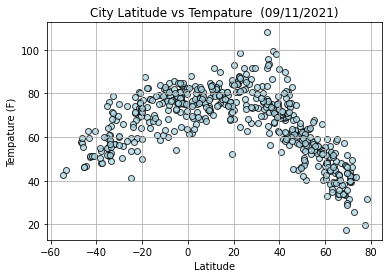

In [128]:
# create a scatter plot using lat and temp for the axis
plt.scatter(lat, temp, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Tempature  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Tempature (F)')
plt.show()

## Latitude vs. Humidity Plot

Student Note - There does not appear to be any correlation between latitude and humidity percengage;


Student Note - Within the dataset of cities selected, at the equator, there are no cities below 60% humidity; this could be researched or proven by looking at more cities with latitudes closer to the equator.

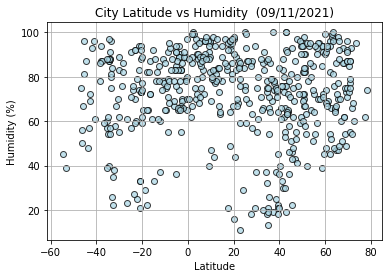

In [127]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Humidity  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

Student Note - While no obvious correlation is observed, it does appear that within the dataset of cities and when north of the equator, there are more citie closer or at 100% cloudiness and alos at or close to 0% cloudiness.

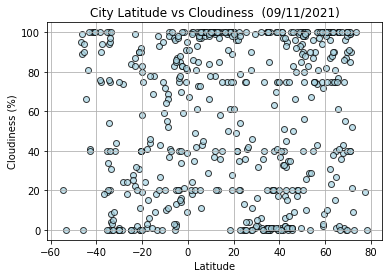

In [126]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, cloudy, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Cloudiness  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

Student Note - There does not appear to be any visual corelation between latitude and windspeed in the data set of cities selected.

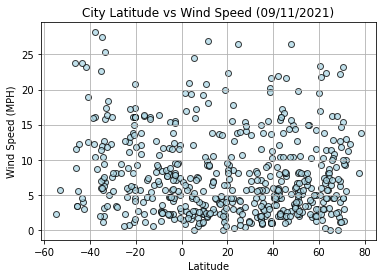

In [131]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, windspeed, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


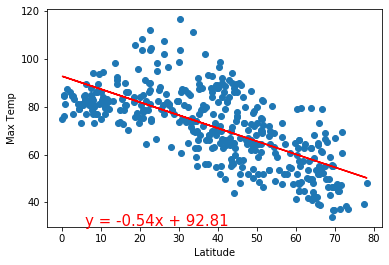

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


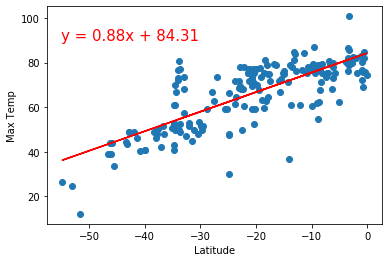

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


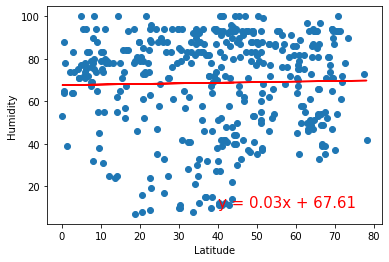

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


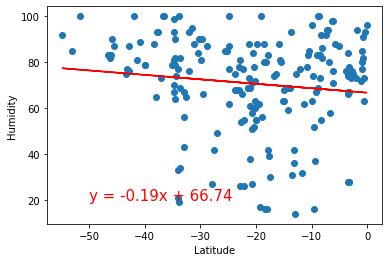

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


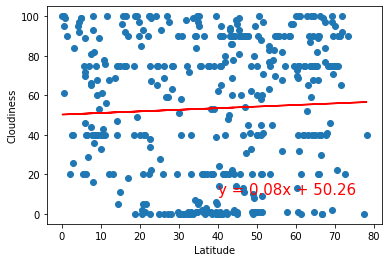

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


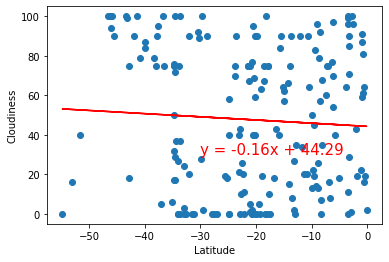

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


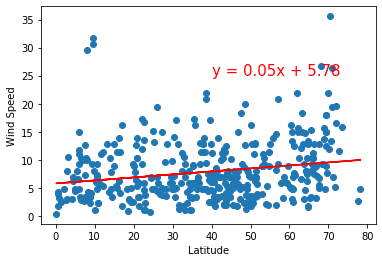

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


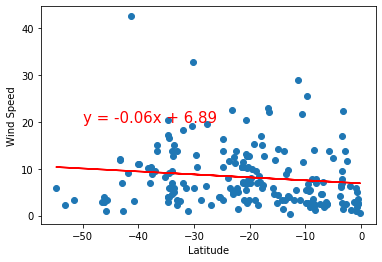